In [965]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(69)

risk_free_rate=.0655
tickers = "SPY BTC-USD BANDHANBNK.NS GILLETTE.NS NCC.NS FORTIS.NS RECLTD.NS DIVISLAB.NS COROMANDEL.NS"
start_date = "2023-01-01"
end_date = "2023-12-31"
data = yf.download(tickers, start=start_date, end=end_date)
data

[*********************100%***********************]  9 of 9 completed


Price                         Adj Close                              \
Ticker                    BANDHANBNK.NS       BTC-USD COROMANDEL.NS   
Date                                                                  
2023-01-01 00:00:00+00:00           NaN  16625.080078           NaN   
2023-01-02 00:00:00+00:00    236.759491  16688.470703    877.051392   
2023-01-03 00:00:00+00:00    237.153839  16679.857422    880.080872   
2023-01-04 00:00:00+00:00    236.710190  16863.238281    875.047974   
2023-01-05 00:00:00+00:00    237.104553  16836.736328    882.133240   
...                                 ...           ...           ...   
2023-12-26 00:00:00+00:00    233.161484  42520.402344   1258.540527   
2023-12-27 00:00:00+00:00    236.188278  43442.855469   1238.066406   
2023-12-28 00:00:00+00:00    237.528000  42627.855469   1235.177124   
2023-12-29 00:00:00+00:00    239.562393  42099.402344   1247.033203   
2023-12-30 00:00:00+00:00           NaN  42156.902344           NaN   

Price                                                                        \
Ticker                     DIVISLAB.NS   FORTIS.NS  GILLETTE.NS      NCC.NS   
Date                                                                          
2023-01-01 00:00:00+00:00          NaN         NaN          NaN         NaN   
2023-01-02 00:00:00+00:00  3298.538086  280.516205  4902.710449   88.490486   
2023-01-03 00:00:00+00:00  3318.440918  282.157806  4911.818848   87.477242   
2023-01-04 00:00:00+00:00  3360.055908  281.809570  4925.580078   87.959740   
2023-01-05 00:00:00+00:00  3385.778076  285.639984  4915.541504   89.986237   
...                                ...         ...          ...         ...   
2023-12-26 00:00:00+00:00  3839.931885  395.286987  6064.657227  166.348083   
2023-12-27 00:00:00+00:00  3860.555420  399.378571  6075.841797  167.241882   
2023-12-28 00:00:00+00:00  3915.915527  404.468079  6511.996582  165.603241   
2023-12-29 00:00:00+00:00  3880.085449  418.339600  6445.136719  165.603241   
2023-12-30 00:00:00+00:00          NaN         NaN          NaN         NaN   

Price                                                     Close  ...  \
Ticker                      RECLTD.NS         SPY BANDHANBNK.NS  ...   
Date                                                             ...   
2023-01-01 00:00:00+00:00         NaN         NaN           NaN  ...   
2023-01-02 00:00:00+00:00  108.514381         NaN    240.149994  ...   
2023-01-03 00:00:00+00:00  110.857712  371.614441    240.550003  ...   
2023-01-04 00:00:00+00:00  110.136673  374.483368    240.100006  ...   
2023-01-05 00:00:00+00:00  111.623802  370.209229    240.500000  ...   
...                               ...         ...           ...  ...   
2023-12-26 00:00:00+00:00  408.353302  471.206543    234.949997  ...   
2023-12-27 00:00:00+00:00  400.069305  472.058533    238.000000  ...   
2023-12-28 00:00:00+00:00  399.825653  472.236847    239.350006  ...   
2023-12-29 00:00:00+00:00  402.359589  470.869720    241.399994  ...   
2023-12-30 00:00:00+00:00         NaN         NaN           NaN  ...   

Price                            Open        Volume               \
Ticker                            SPY BANDHANBNK.NS      BTC-USD   
Date                                                               
2023-01-01 00:00:00+00:00         NaN           NaN   9244361700   
2023-01-02 00:00:00+00:00         NaN     7625641.0  12097775227   
2023-01-03 00:00:00+00:00  384.369995     6273607.0  13903079207   
2023-01-04 00:00:00+00:00  383.179993    10555612.0  18421743322   
2023-01-05 00:00:00+00:00  381.720001     8344344.0  13692758566   
...                               ...           ...          ...   
2023-12-26 00:00:00+00:00  474.070007     6304183.0  30026850982   
2023-12-27 00:00:00+00:00  475.440002     8058617.0  25260941032   
2023-12-28 00:00:00+00:00  476.880005    12591185.0  22992093014   
2023-12-29 00:00:00+00:00  476.489990     4590031.0  26000021055   
2023-

In [966]:
df=data[[('Adj Close', 'BANDHANBNK.NS'),
         ('Adj Close', 'COROMANDEL.NS'),
            ('Adj Close',   'DIVISLAB.NS'),
            ('Adj Close',     'FORTIS.NS'),
            ('Adj Close',   'GILLETTE.NS'),
            ('Adj Close',        'NCC.NS'),
            ('Adj Close',     'RECLTD.NS'),]]
df.dropna(inplace=True)
df

Price                         Adj Close                             \
Ticker                    BANDHANBNK.NS COROMANDEL.NS  DIVISLAB.NS   
Date                                                                 
2023-01-02 00:00:00+00:00    236.759491    877.051392  3298.538086   
2023-01-03 00:00:00+00:00    237.153839    880.080872  3318.440918   
2023-01-04 00:00:00+00:00    236.710190    875.047974  3360.055908   
2023-01-05 00:00:00+00:00    237.104553    882.133240  3385.778076   
2023-01-06 00:00:00+00:00    238.928436    881.253662  3359.419922   
...                                 ...           ...          ...   
2023-12-22 00:00:00+00:00    233.012634   1226.509277  3672.410156   
2023-12-26 00:00:00+00:00    233.161484   1258.540527  3839.931885   
2023-12-27 00:00:00+00:00    236.188278   1238.066406  3860.555420   
2023-12-28 00:00:00+00:00    237.528000   1235.177124  3915.915527   
2023-12-29 00:00:00+00:00    239.562393   1247.033203  3880.085449   

Price                                                                       
Ticker                      FORTIS.NS  GILLETTE.NS      NCC.NS   RECLTD.NS  
Date                                                                        
2023-01-02 00:00:00+00:00  280.516205  4902.710449   88.490486  108.514381  
2023-01-03 00:00:00+00:00  282.157806  4911.818848   87.477242  110.857712  
2023-01-04 00:00:00+00:00  281.809570  4925.580078   87.959740  110.136673  
2023-01-05 00:00:00+00:00  285.639984  4915.541504   89.986237  111.623802  
2023-01-06 00:00:00+00:00  283.401459  4893.602051   90.854744  111.488602  
...                               ...          ...         ...         ...  
2023-12-22 00:00:00+00:00  389.898071  6105.170898  162.872147  396.268402  
2023-12-26 00:00:00+00:00  395.286987  6064.657227  166.348083  408.353302  
2023-12-27 00:00:00+00:00  399.378571  6075.841797  167.241882  400.069305  
2023-12-28 00:00:00+00:00  404.468079  6511.996582  165.603241  399.825653  
2023-12-29 00:00:00+00:00  418.339600  6445.136719  165.603241  402.359589  

[245 rows x 7 columns]

In [967]:
returns = df.pct_change().dropna()
returns.columns = returns.columns.get_level_values(1)
mean_returns = returns.mean()
annualised_mean_returns=mean_returns*252
annualised_mean_returns


Ticker
BANDHANBNK.NS    0.052528
COROMANDEL.NS    0.386584
DIVISLAB.NS      0.205607
FORTIS.NS        0.439350
GILLETTE.NS      0.308685
NCC.NS           0.729242
RECLTD.NS        1.423680
dtype: float64

<Axes: title={'center': 'Stock Prices'}, xlabel='Date', ylabel='Price'>

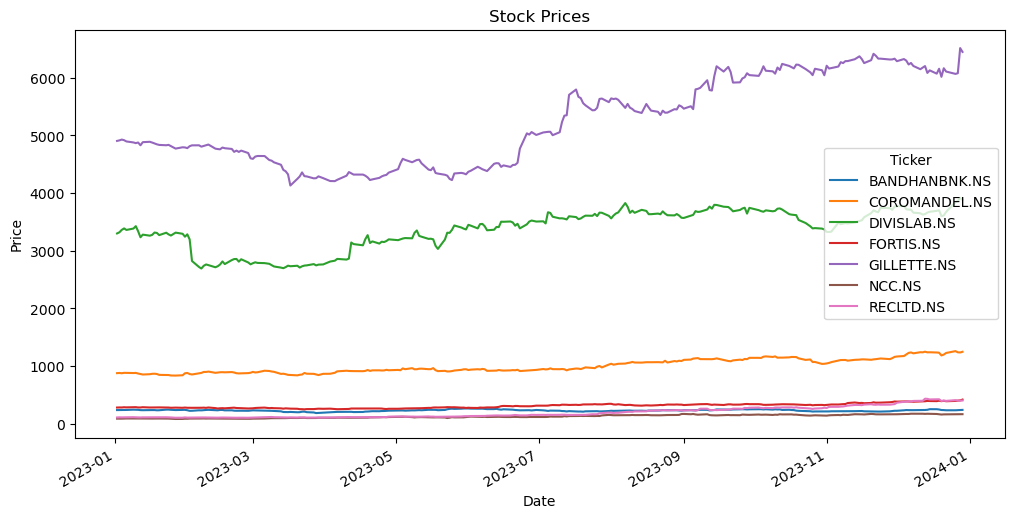

In [968]:
df['Adj Close'].plot(figsize=(12, 6), title='Stock Prices', xlabel='Date', ylabel='Price')

In [969]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BANDHANBNK.NS,COROMANDEL.NS,DIVISLAB.NS,FORTIS.NS,GILLETTE.NS,NCC.NS,RECLTD.NS
Ticker,,,,,,,
BANDHANBNK.NS,0.000321,0.000074,0.000030,0.000030,0.000001,0.000066,0.000124
COROMANDEL.NS,0.000074,0.000182,0.000042,0.000017,0.000019,0.000061,0.000078
DIVISLAB.NS,0.000030,0.000042,0.000300,0.000041,0.000026,-0.000013,0.000011
FORTIS.NS,0.000030,0.000017,0.000041,0.000210,0.000025,0.000019,0.000049
GILLETTE.NS,0.000001,0.000019,0.000026,0.000025,0.000211,0.000005,0.000007
NCC.NS,0.000066,0.000061,-0.000013,0.000019,0.000005,0.000652,0.000154
RECLTD.NS,0.000124,0.000078,0.000011,0.000049,0.000007,0.000154,0.000538


In [970]:
variance=returns.var()
variance
annualised_variance=variance*252
standard_deviation=np.sqrt(annualised_variance)
standard_deviation

Ticker
BANDHANBNK.NS    0.284518
COROMANDEL.NS    0.214093
DIVISLAB.NS      0.275053
FORTIS.NS        0.229771
GILLETTE.NS      0.230397
NCC.NS           0.405381
RECLTD.NS        0.368368
dtype: float64

## Equally Weighted Portfolio

In [971]:
x=1/7
weights=np.array([x for i in range(0,7)])
weights
portfolio_return=np.dot(mean_returns,weights)*252
portfolio_return
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))*252
portfolio_variance
portfolio_risk=np.sqrt(portfolio_variance)

portfolio_variance

0.02133212770819838

In [972]:
portfolio_risk

0.14605522143421776

In [973]:
portfolio_return

0.5065250638959685

In [974]:
Sharpe_ratio=portfolio_return-risk_free_rate
Sharpe_ratio=Sharpe_ratio/portfolio_risk
Sharpe_ratio

3.019577523934008

## Minimum Variance Portfolio

In [975]:
def make_random_portfolio(n,returns, covariance_matrix):
    random_weights=np.random.rand(n)
    random_weights=random_weights/np.sum(random_weights)
    portfolio_return=np.dot(random_weights,returns)*252
    portfolio_variance=np.dot(random_weights.T,np.dot(covariance_matrix,random_weights))*252

    return random_weights,portfolio_return,portfolio_variance

In [976]:
min_variance=100
er=[]
sigma=[]
sharpe_ratio=0
min_weights=np.ones(7)
for i in range(0,1000000):
    x,y,z=make_random_portfolio(7,mean_returns,cov_matrix)
    er.append(y)
    sigma.append(np.sqrt(z))
    if(z<min_variance):
        min_variance=z
        min_weights=x
        min_return=y
    sharpe_temp=(y-risk_free_rate)/np.sqrt(z)
    if(sharpe_temp>sharpe_ratio):
        sharpe_ratio=sharpe_temp
        sharpe_weights=x
        sharpe_return=y
        sharpe_variance=z


In [977]:
print(f"min_var_weights: {min_weights}")
print(f"min_var_return: {min_return}")
print(f"min_variance: {min_variance}")
print(f"max_sharpe_ratio: {sharpe_ratio}")
print(f"max_sharpe_weights: {sharpe_weights}")
print(f"max_sharpe_return: {sharpe_return}")
print(f"max_sharpe_variance: {sharpe_variance}")

min_var_weights: [0.10405969 0.21554684 0.13784089 0.21806142 0.22953848 0.06458244
 0.03037024]
min_var_return: 0.37412811175153704
min_variance: 0.016726284496890308
max_sharpe_ratio: 4.012981035548424
max_sharpe_weights: [0.00102452 0.07376837 0.00566432 0.23435247 0.14817454 0.09443998
 0.44257581]
max_sharpe_return: 0.8773939316223901
max_sharpe_variance: 0.04093213294127797


## Efficient Frontier and Tangency Portfolio

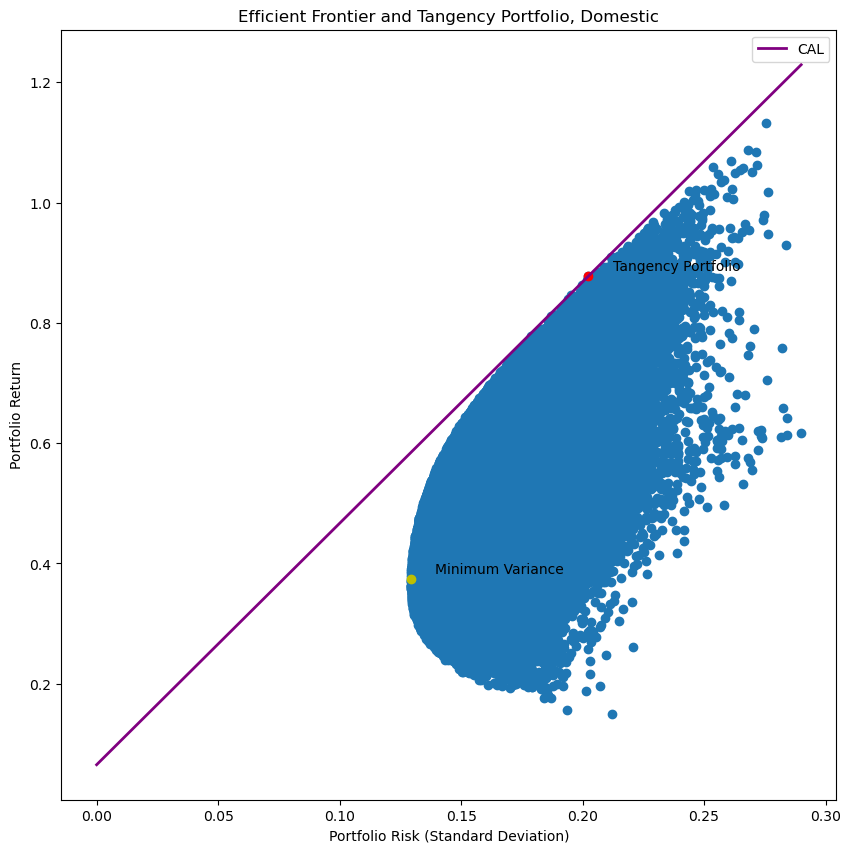

In [978]:
plt.figure(figsize=(10,10))
plt.scatter(sigma,er)
plt.scatter(np.sqrt(sharpe_variance),sharpe_return,c="r")
plt.scatter(np.sqrt(min_variance),min_return, c='y')


plt.annotate('Tangency Portfolio', 
             xy=(np.sqrt(sharpe_variance),sharpe_return), 
             xytext=(np.sqrt(sharpe_variance) + 0.01,sharpe_return + 0.01),
             fontsize=10)

plt.annotate('Minimum Variance', 
             xy=(np.sqrt(min_variance),min_return), 
             xytext=(np.sqrt(min_variance) + 0.01,min_return + 0.01),
             fontsize=10)

x = np.linspace(0, max(sigma), 100)
y = risk_free_rate + sharpe_ratio * x
plt.title("Efficient Frontier and Tangency Portfolio, Domestic")
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.plot(x,y,c='purple',label='CAL',linewidth=2)
plt.legend()

# International Portfolio with SPY


In [979]:
df=data[[('Adj Close', 'BANDHANBNK.NS'),
            ('Adj Close', 'COROMANDEL.NS'),
            ('Adj Close',   'DIVISLAB.NS'),
            ('Adj Close',     'FORTIS.NS'),
            ('Adj Close',   'GILLETTE.NS'),
            ('Adj Close',        'NCC.NS'),
            ('Adj Close',     'RECLTD.NS'),
            ('Adj Close',           'SPY'),]]
df.dropna(inplace=True)
df

Price                         Adj Close                             \
Ticker                    BANDHANBNK.NS COROMANDEL.NS  DIVISLAB.NS   
Date                                                                 
2023-01-03 00:00:00+00:00    237.153839    880.080872  3318.440918   
2023-01-04 00:00:00+00:00    236.710190    875.047974  3360.055908   
2023-01-05 00:00:00+00:00    237.104553    882.133240  3385.778076   
2023-01-06 00:00:00+00:00    238.928436    881.253662  3359.419922   
2023-01-09 00:00:00+00:00    243.759247    878.615051  3383.479736   
...                                 ...           ...          ...   
2023-12-22 00:00:00+00:00    233.012634   1226.509277  3672.410156   
2023-12-26 00:00:00+00:00    233.161484   1258.540527  3839.931885   
2023-12-27 00:00:00+00:00    236.188278   1238.066406  3860.555420   
2023-12-28 00:00:00+00:00    237.528000   1235.177124  3915.915527   
2023-12-29 00:00:00+00:00    239.562393   1247.033203  3880.085449   

Price                                                                       \
Ticker                      FORTIS.NS  GILLETTE.NS      NCC.NS   RECLTD.NS   
Date                                                                         
2023-01-03 00:00:00+00:00  282.157806  4911.818848   87.477242  110.857712   
2023-01-04 00:00:00+00:00  281.809570  4925.580078   87.959740  110.136673   
2023-01-05 00:00:00+00:00  285.639984  4915.541504   89.986237  111.623802   
2023-01-06 00:00:00+00:00  283.401459  4893.602051   90.854744  111.488602   
2023-01-09 00:00:00+00:00  285.789215  4876.218262   90.275742  113.155983   
...                               ...          ...         ...         ...   
2023-12-22 00:00:00+00:00  389.898071  6105.170898  162.872147  396.268402   
2023-12-26 00:00:00+00:00  395.286987  6064.657227  166.348083  408.353302   
2023-12-27 00:00:00+00:00  399.378571  6075.841797  167.241882  400.069305   
2023-12-28 00:00:00+00:00  404.468079  6511.996582  165.603241  399.825653   
2023-12-29 00:00:00+00:00  418.339600  6445.136719  165.603241  402.359589   

Price                                  
Ticker                            SPY  
Date                                   
2023-01-03 00:00:00+00:00  371.614441  
2023-01-04 00:00:00+00:00  374.483368  
2023-01-05 00:00:00+00:00  370.209229  
2023-01-06 00:00:00+00:00  378.698914  
2023-01-09 00:00:00+00:00  378.484222  
...                               ...  
2023-12-22 00:00:00+00:00  469.225250  
2023-12-26 00:00:00+00:00  471.206543  
2023-12-27 00:00:00+00:00  472.058533  
2023-12-28 00:00:00+00:00  472.236847  
2023-12-29 00:00:00+00:00  470.869720  

[237 rows x 8 columns]

In [980]:
returns = df.pct_change().dropna()
returns.columns = returns.columns.get_level_values(1)
mean_returns = returns.mean()
annualised_mean_returns=mean_returns*252
annualised_mean_returns

Ticker
BANDHANBNK.NS    0.053290
COROMANDEL.NS    0.396239
DIVISLAB.NS      0.205672
FORTIS.NS        0.448510
GILLETTE.NS      0.317067
NCC.NS           0.764735
RECLTD.NS        1.449246
SPY              0.262092
dtype: float64

In [981]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BANDHANBNK.NS,COROMANDEL.NS,DIVISLAB.NS,FORTIS.NS,GILLETTE.NS,NCC.NS,RECLTD.NS,SPY
Ticker,,,,,,,,
BANDHANBNK.NS,3.380302e-04,7.761537e-05,0.000025,0.000027,2.863362e-07,0.000069,0.000129,-3.790279e-06
COROMANDEL.NS,7.761537e-05,1.899467e-04,0.000041,0.000016,1.954669e-05,0.000061,0.000086,-4.256670e-07
DIVISLAB.NS,2.539485e-05,4.060977e-05,0.000306,0.000045,2.561739e-05,-0.000017,0.000008,6.440620e-06
FORTIS.NS,2.735254e-05,1.570731e-05,0.000045,0.000221,2.405788e-05,0.000021,0.000045,2.959410e-06
GILLETTE.NS,2.863362e-07,1.954669e-05,0.000026,0.000024,2.169825e-04,0.000007,0.000006,-1.962043e-06
NCC.NS,6.925328e-05,6.072903e-05,-0.000017,0.000021,7.060184e-06,0.000662,0.000165,1.446709e-05
RECLTD.NS,1.287286e-04,8.550305e-05,0.000008,0.000045,5.782001e-06,0.000165,0.000558,1.352595e-05
SPY,-3.790279e-06,-4.256670e-07,0.000006,0.000003,-1.962043e-06,0.000014,0.000014,7.333018e-05


In [982]:
variance=returns.var()
variance
annualised_variance=variance*252
standard_deviation=np.sqrt(annualised_variance)
standard_deviation

Ticker
BANDHANBNK.NS    0.291862
COROMANDEL.NS    0.218784
DIVISLAB.NS      0.277883
FORTIS.NS        0.235834
GILLETTE.NS      0.233837
NCC.NS           0.408318
RECLTD.NS        0.374996
SPY              0.135938
dtype: float64

## Minimum Variance Portfolio

In [983]:
min_variance=100
er=[]
sigma=[]
sharpe_ratio=0
min_weights=np.ones(8)
for i in range(0,1000000):
    x,y,z=make_random_portfolio(8,mean_returns,cov_matrix)
    er.append(y)
    sigma.append(np.sqrt(z))
    if(z<min_variance):
        min_variance=z
        min_weights=x
        min_return=y
    sharpe_temp=(y-risk_free_rate)/np.sqrt(z)
    if(sharpe_temp>sharpe_ratio):
        sharpe_ratio=sharpe_temp
        sharpe_weights=x
        sharpe_return=y
        sharpe_variance=z


In [984]:
print(f"min_var_weights: {min_weights}")
print(f"min_var_return: {min_return}")
print(f"min_variance: {min_variance}")
print(f"max_sharpe_ratio: {sharpe_ratio}")
print(f"max_sharpe_weights: {sharpe_weights}")
print(f"max_sharpe_return: {sharpe_return}")
print(f"max_sharpe_variance: {sharpe_variance}")

min_var_weights: [0.04503219 0.17878921 0.07735696 0.08499529 0.12326437 0.03938869
 0.01072117 0.44045212]
min_var_return: 0.327455962153676
min_variance: 0.00938859147699968
max_sharpe_ratio: 4.194596689924936
max_sharpe_weights: [0.00442332 0.06400092 0.01524716 0.13683228 0.157141   0.03929555
 0.31289041 0.27016936]
max_sharpe_return: 0.6942411029928832
max_sharpe_variance: 0.02246794156270871


## Efficient Frontier and Tangency Portfolio


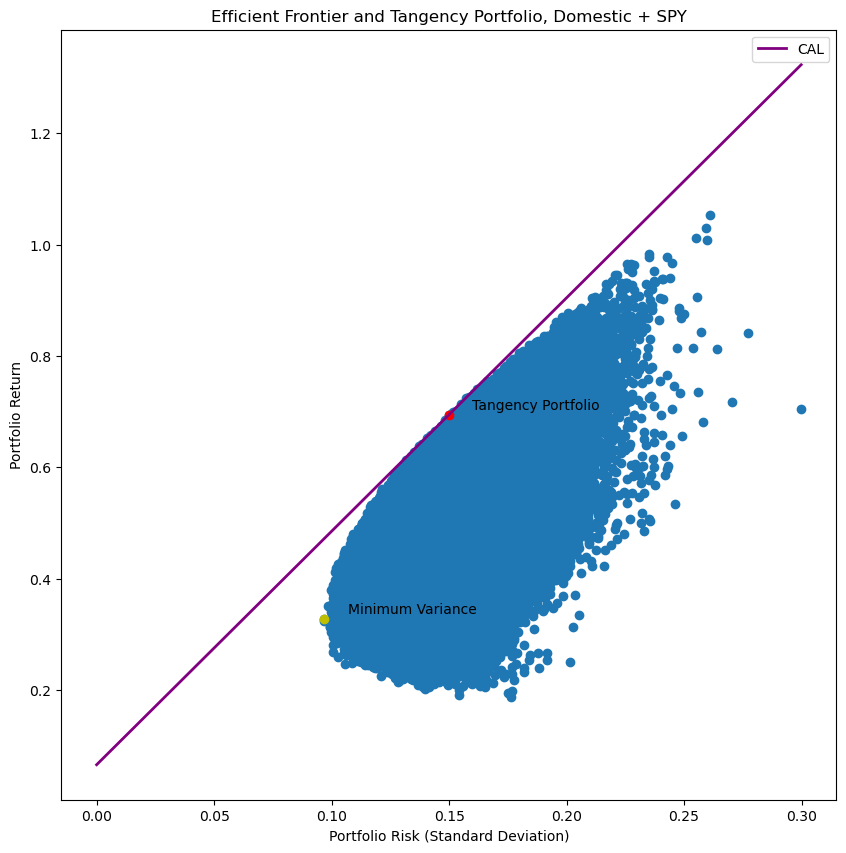

In [985]:
plt.figure(figsize=(10,10))
plt.scatter(sigma,er)
plt.scatter(np.sqrt(sharpe_variance),sharpe_return,c="r")
plt.scatter(np.sqrt(min_variance),min_return, c='y')


plt.annotate('Tangency Portfolio', 
             xy=(np.sqrt(sharpe_variance),sharpe_return), 
             xytext=(np.sqrt(sharpe_variance) + 0.01,sharpe_return + 0.01),
             fontsize=10)

plt.annotate('Minimum Variance', 
             xy=(np.sqrt(min_variance),min_return), 
             xytext=(np.sqrt(min_variance) + 0.01,min_return + 0.01),
             fontsize=10)


x = np.linspace(0, max(sigma), 100)
y = risk_free_rate + sharpe_ratio * x
plt.title("Efficient Frontier and Tangency Portfolio, Domestic + SPY")
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.plot(x,y,c='purple',label='CAL',linewidth=2)
plt.legend()

# International Portfolio with SPY and Bitcoin


In [986]:
df=data[[('Adj Close', 'BANDHANBNK.NS'),
            ('Adj Close',       'BTC-USD'),
            ('Adj Close', 'COROMANDEL.NS'),
            ('Adj Close',   'DIVISLAB.NS'),
            ('Adj Close',     'FORTIS.NS'),
            ('Adj Close',   'GILLETTE.NS'),
            ('Adj Close',        'NCC.NS'),
            ('Adj Close',     'RECLTD.NS'),
            ('Adj Close',           'SPY'),]]
df.dropna(inplace=True)
df

Price                         Adj Close                              \
Ticker                    BANDHANBNK.NS       BTC-USD COROMANDEL.NS   
Date                                                                  
2023-01-03 00:00:00+00:00    237.153839  16679.857422    880.080872   
2023-01-04 00:00:00+00:00    236.710190  16863.238281    875.047974   
2023-01-05 00:00:00+00:00    237.104553  16836.736328    882.133240   
2023-01-06 00:00:00+00:00    238.928436  16951.968750    881.253662   
2023-01-09 00:00:00+00:00    243.759247  17196.554688    878.615051   
...                                 ...           ...           ...   
2023-12-22 00:00:00+00:00    233.012634  43997.902344   1226.509277   
2023-12-26 00:00:00+00:00    233.161484  42520.402344   1258.540527   
2023-12-27 00:00:00+00:00    236.188278  43442.855469   1238.066406   
2023-12-28 00:00:00+00:00    237.528000  42627.855469   1235.177124   
2023-12-29 00:00:00+00:00    239.562393  42099.402344   1247.033203   

Price                                                                        \
Ticker                     DIVISLAB.NS   FORTIS.NS  GILLETTE.NS      NCC.NS   
Date                                                                          
2023-01-03 00:00:00+00:00  3318.440918  282.157806  4911.818848   87.477242   
2023-01-04 00:00:00+00:00  3360.055908  281.809570  4925.580078   87.959740   
2023-01-05 00:00:00+00:00  3385.778076  285.639984  4915.541504   89.986237   
2023-01-06 00:00:00+00:00  3359.419922  283.401459  4893.602051   90.854744   
2023-01-09 00:00:00+00:00  3383.479736  285.789215  4876.218262   90.275742   
...                                ...         ...          ...         ...   
2023-12-22 00:00:00+00:00  3672.410156  389.898071  6105.170898  162.872147   
2023-12-26 00:00:00+00:00  3839.931885  395.286987  6064.657227  166.348083   
2023-12-27 00:00:00+00:00  3860.555420  399.378571  6075.841797  167.241882   
2023-12-28 00:00:00+00:00  3915.915527  404.468079  6511.996582  165.603241   
2023-12-29 00:00:00+00:00  3880.085449  418.339600  6445.136719  165.603241   

Price                                              
Ticker                      RECLTD.NS         SPY  
Date                                               
2023-01-03 00:00:00+00:00  110.857712  371.614441  
2023-01-04 00:00:00+00:00  110.136673  374.483368  
2023-01-05 00:00:00+00:00  111.623802  370.209229  
2023-01-06 00:00:00+00:00  111.488602  378.698914  
2023-01-09 00:00:00+00:00  113.155983  378.484222  
...                               ...         ...  
2023-12-22 00:00:00+00:00  396.268402  469.225250  
2023-12-26 00:00:00+00:00  408.353302  471.206543  
2023-12-27 00:00:00+00:00  400.069305  472.058533  
2023-12-28 00:00:00+00:00  399.825653  472.236847  
2023-12-29 00:00:00+00:00  402.359589  470.869720  

[237 rows x 9 columns]

In [987]:
returns = df.pct_change().dropna()
returns.columns = returns.columns.get_level_values(1)
mean_returns = returns.mean()
annualised_mean_returns=mean_returns*252
annualised_mean_returns

Ticker
BANDHANBNK.NS    0.053290
BTC-USD          1.102675
COROMANDEL.NS    0.396239
DIVISLAB.NS      0.205672
FORTIS.NS        0.448510
GILLETTE.NS      0.317067
NCC.NS           0.764735
RECLTD.NS        1.449246
SPY              0.262092
dtype: float64

In [988]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BANDHANBNK.NS,BTC-USD,COROMANDEL.NS,DIVISLAB.NS,FORTIS.NS,GILLETTE.NS,NCC.NS,RECLTD.NS,SPY
Ticker,,,,,,,,,
BANDHANBNK.NS,3.380302e-04,-0.000048,7.761537e-05,0.000025,0.000027,2.863362e-07,0.000069,0.000129,-3.790279e-06
BTC-USD,-4.770463e-05,0.000922,-7.592396e-05,-0.000045,-0.000051,-4.790335e-05,-0.000118,-0.000028,4.648070e-05
COROMANDEL.NS,7.761537e-05,-0.000076,1.899467e-04,0.000041,0.000016,1.954669e-05,0.000061,0.000086,-4.256670e-07
DIVISLAB.NS,2.539485e-05,-0.000045,4.060977e-05,0.000306,0.000045,2.561739e-05,-0.000017,0.000008,6.440620e-06
FORTIS.NS,2.735254e-05,-0.000051,1.570731e-05,0.000045,0.000221,2.405788e-05,0.000021,0.000045,2.959410e-06
GILLETTE.NS,2.863362e-07,-0.000048,1.954669e-05,0.000026,0.000024,2.169825e-04,0.000007,0.000006,-1.962043e-06
NCC.NS,6.925328e-05,-0.000118,6.072903e-05,-0.000017,0.000021,7.060184e-06,0.000662,0.000165,1.446709e-05
RECLTD.NS,1.287286e-04,-0.000028,8.550305e-05,0.000008,0.000045,5.782001e-06,0.000165,0.000558,1.352595e-05
SPY,-3.790279e-06,0.000046,-4.256670e-07,0.000006,0.000003,-1.962043e-06,0.000014,0.000014,7.333018e-05


In [989]:
variance=returns.var()
variance
annualised_variance=variance*252
standard_deviation=np.sqrt(annualised_variance)
standard_deviation

Ticker
BANDHANBNK.NS    0.291862
BTC-USD          0.481974
COROMANDEL.NS    0.218784
DIVISLAB.NS      0.277883
FORTIS.NS        0.235834
GILLETTE.NS      0.233837
NCC.NS           0.408318
RECLTD.NS        0.374996
SPY              0.135938
dtype: float64

## Minimum Variance Portfolio

In [990]:
min_variance=100
er=[]
sigma=[]
sharpe_ratio=0
min_weights=np.ones(9)
for i in range(0,1000000):
    x,y,z=make_random_portfolio(9,mean_returns,cov_matrix)
    er.append(y)
    sigma.append(np.sqrt(z))
    if(z<min_variance):
        min_variance=z
        min_weights=x
        min_return=y
    sharpe_temp=(y-risk_free_rate)/np.sqrt(z)
    if(sharpe_temp>sharpe_ratio):
        sharpe_ratio=sharpe_temp
        sharpe_weights=x
        sharpe_return=y
        sharpe_variance=z


In [991]:
print(f"min_var_weights: {min_weights}")
print(f"min_var_return: {min_return}")
print(f"min_variance: {min_variance}")
print(f"max_sharpe_ratio: {sharpe_ratio}")
print(f"max_sharpe_weights: {sharpe_weights}")
print(f"max_sharpe_return: {sharpe_return}")
print(f"max_sharpe_variance: {sharpe_variance}")

min_var_weights: [0.04121319 0.0656384  0.15570444 0.08581221 0.13496556 0.1077763
 0.02959362 0.03044047 0.34885582]
min_var_return: 0.40680442203028033
min_variance: 0.0089255982739776
max_sharpe_ratio: 4.918451653020361
max_sharpe_weights: [0.00347994 0.15926806 0.07270557 0.01156382 0.12301833 0.14119986
 0.07231359 0.26404812 0.15240271]
max_sharpe_return: 0.7848531318635135
max_sharpe_variance: 0.021390821514664447


## Efficient Frontier and Tangency Portfolio

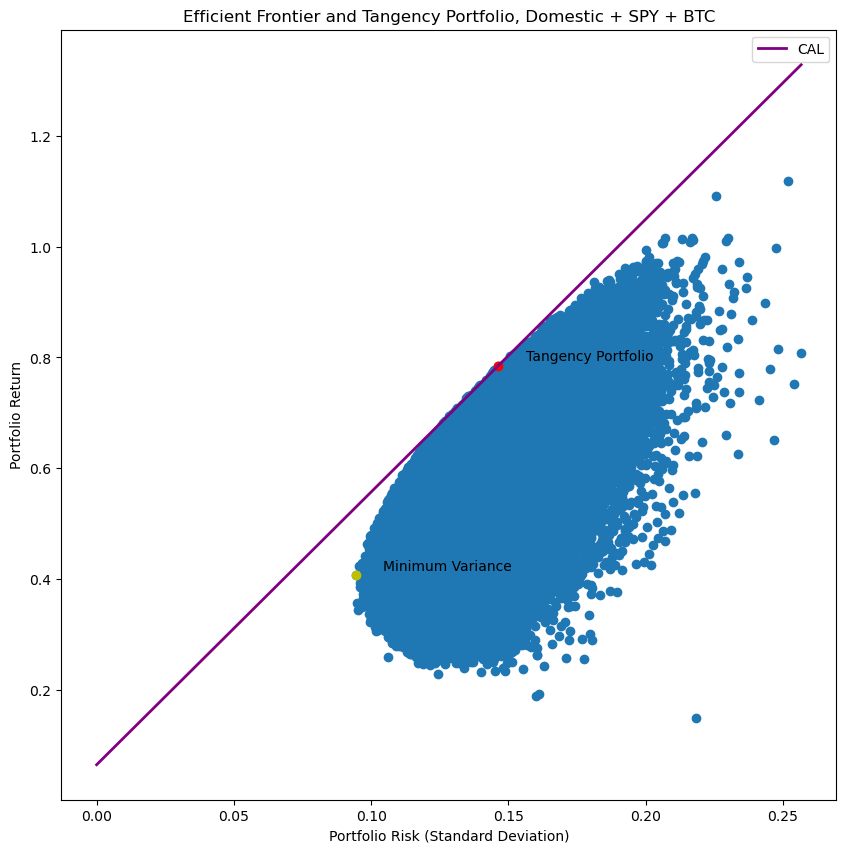

In [992]:
plt.figure(figsize=(10,10))
plt.scatter(sigma,er)
plt.scatter(np.sqrt(sharpe_variance),sharpe_return,c="r")
plt.scatter(np.sqrt(min_variance),min_return, c='y')


plt.annotate('Tangency Portfolio', 
             xy=(np.sqrt(sharpe_variance),sharpe_return), 
             xytext=(np.sqrt(sharpe_variance) + 0.01,sharpe_return + 0.01),
             fontsize=10)

plt.annotate('Minimum Variance', 
             xy=(np.sqrt(min_variance),min_return), 
             xytext=(np.sqrt(min_variance) + 0.01,min_return + 0.01),
             fontsize=10)


x = np.linspace(0, max(sigma), 100)
y = risk_free_rate + sharpe_ratio * x
plt.title("Efficient Frontier and Tangency Portfolio, Domestic + SPY + BTC")
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.plot(x,y,c='purple',label='CAL',linewidth=2)
plt.legend()